In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
file_path = "homeprices.csv" 
df = pd.read_csv(file_path)

In [3]:
print("📄 Dataset Shape:", df.shape)
print(df.head())

📄 Dataset Shape: (6, 4)
   area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       NaN   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000


In [4]:
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Dakshina Prasath\AppData\Local\Temp\ipykernel_564\3141900507.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [5]:
label_encoders = {}
for col in df.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


In [11]:
print("\n📊 Model Evaluation:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")


📊 Model Evaluation:
R² Score: -39.1996
RMSE: 47552.37


In [12]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\n📌 Feature Coefficients:")
print(coefficients)



📌 Feature Coefficients:
    Feature   Coefficient
1  bedrooms  37210.982659
0      area    127.890173
2       age  -1791.907514


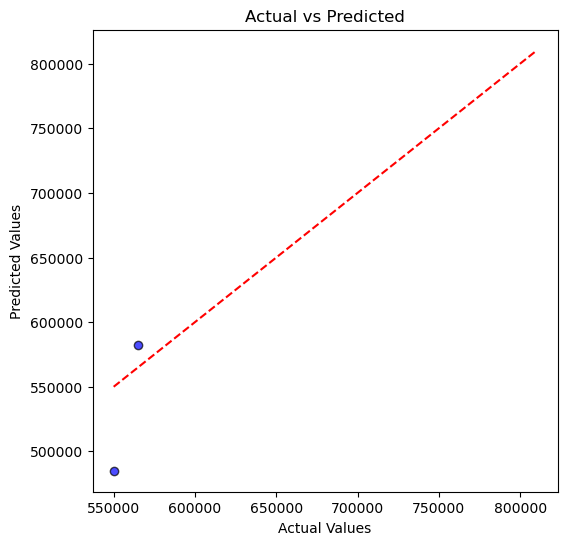

In [13]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [17]:
threshold = y.median()
y_test_class = (y_test >= threshold).astype(int)
y_pred_class = (y_pred >= threshold).astype(int)

# ===== STEP 13: Confusion Matrix & Accuracy =====
cm = confusion_matrix(y_test_class, y_pred_class, labels=[0, 1])
tn, fp, fn, tp = cm.ravel()
acc = accuracy_score(y_test_class, y_pred_class)

print("\n📌 Classification Metrics (Based on Threshold):")
print("Confusion Matrix (rows = actual, cols = predicted):")
print(cm)
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")
print(f"Accuracy: {acc:.4f}")


📌 Classification Metrics (Based on Threshold):
Confusion Matrix (rows = actual, cols = predicted):
[[2 0]
 [0 0]]
True Negative (TN): 2
False Positive (FP): 0
False Negative (FN): 0
True Positive (TP): 0
Accuracy: 1.0000
